In [1]:
%matplotlib inline 
import sys, os
base_path = os.getcwd()[0:os.getcwd().rfind('Watermark')] + "Watermark/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.asiaccs_main import asiaccs_whitebox
from src.models import get_deep_cnn_for_cifar, get_lenet_model_for_mnist
from src.preprocess_data import load_cifar_images, load_mnist_images
from src.util import plot_whitebox

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Description
In this notebook we are running a surrogate model attack. The attacker and owner data is disjoint.

[1/6] ASIACCS (logo) Whitebox Attack: Loading MNIST data
      Owner data: 30000 Attacker Data: 30000
     Found cached training data for owner_data3000030000
     Found cached training data for attacker_data3000030000
[2/6] Generating ASIACCS watermarked images: Train(5000) Test(1000)
Embedding logo watermarks
Watermark color: 0.5
(Embed Logo) Plot class: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


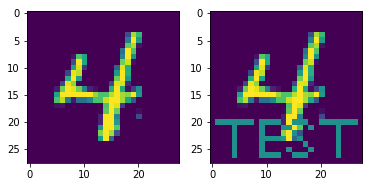

Embedding logo watermarks
Watermark color: 0.5
(Embed Logo) Plot class: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


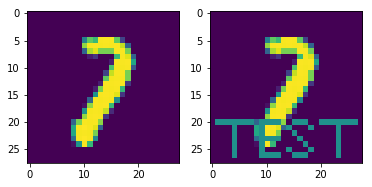

(Debug) Asiaccs whitebox:
Owner: 0.1317073132586369, Attacker: 0.12961363928904912, test: 0.13251460584233699, trigger: 0.1571231342537015, trigger_test: 0.15602684573829534
[3/6] Training the original model and embedding the watermark
Instructions for updating:
Use tf.cast instead.
      Skipping embedding of wm and use a cached entry instead
30000/30000 [==============================] - 11s 372us/step
    Done! Accuracy and loss: [0.04943270740219911, 0.9861]
[4/6] Labeling the attackers data with the original model
[5/6] Removing the watermark with the regularization attack.. 0
Train on 3000 samples, validate on 10000 samples
Epoch 1/30
3000/3000 [==============================] - 6s 2ms/step - loss: 3.9014 - acc: 0.9927 - val_loss: 1.7124 - val_acc: 0.9862
=> Time: : 6.002080202102661
=> watermark_new_val: 0.953
Confusion matrix, without normalization


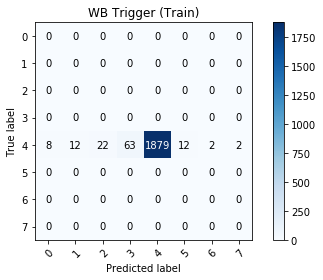

Confusion matrix, without normalization


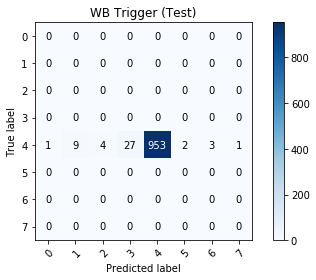

=> watermark_val: 0.9395
Epoch 2/30
3000/3000 [==============================] - 7s 2ms/step - loss: 1.1158 - acc: 0.9823 - val_loss: 0.7231 - val_acc: 0.9739
=> Time: : 7.093704462051392
=> watermark_new_val: 0.164
Confusion matrix, without normalization


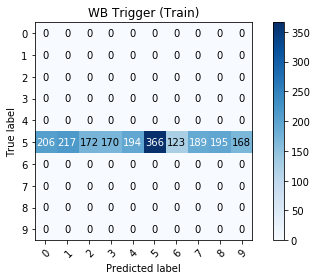

Confusion matrix, without normalization


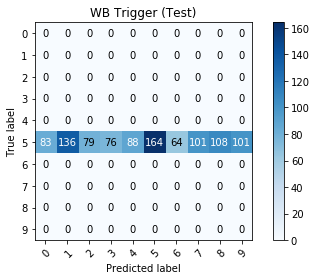

=> watermark_val: 0.183
(Early stopping) Current: [0.183] My value: 0.2
Early Stopping By WM: Patience decreased to 1
Epoch 3/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.5838 - acc: 0.9767 - val_loss: 0.4773 - val_acc: 0.9710
=> Time: : 7.076549768447876
=> watermark_new_val: 0.103
Confusion matrix, without normalization


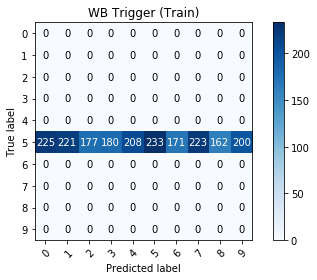

Confusion matrix, without normalization


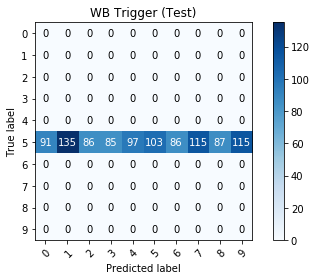

=> watermark_val: 0.1165
(Early stopping) Current: [0.1165] My value: 0.2
Early Stopping By WM: Patience decreased to 0
Epoch 4/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4090 - acc: 0.9870 - val_loss: 0.3600 - val_acc: 0.9774
=> Time: : 6.299259424209595
=> watermark_new_val: 0.081
Confusion matrix, without normalization


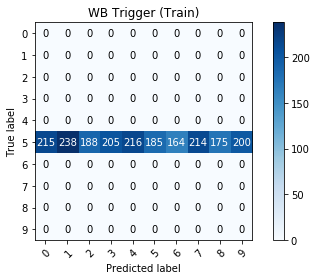

Confusion matrix, without normalization


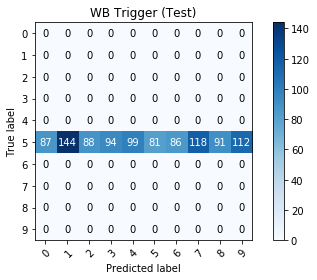

=> watermark_val: 0.0925
(Early stopping) Current: [0.0925] My value: 0.2
Epoch 00003: early stopping THR
[6/6] Training the surrogate model
Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 36s 1ms/step - loss: 0.0702 - acc: 0.9812 - val_loss: 0.0602 - val_acc: 0.9812
=> Time: : 35.55422306060791
=> watermark_new_val: 0.081
Confusion matrix, without normalization


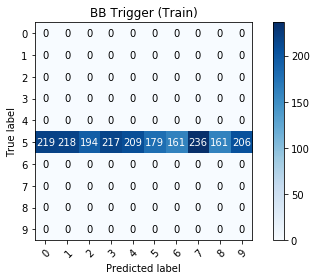

Confusion matrix, without normalization


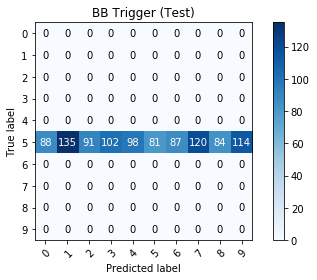

=> watermark_val: 0.0895
Epoch 2/10
30000/30000 [==============================] - 34s 1ms/step - loss: 0.0462 - acc: 0.9893 - val_loss: 0.0477 - val_acc: 0.9849
=> Time: : 34.43567633628845
=> watermark_new_val: 0.084
Confusion matrix, without normalization


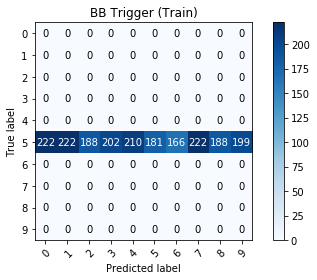

Confusion matrix, without normalization


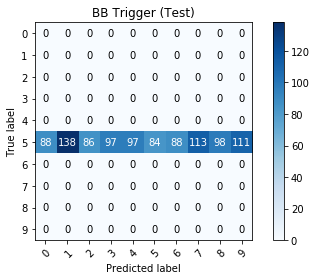

=> watermark_val: 0.0905
Epoch 3/10
30000/30000 [==============================] - 34s 1ms/step - loss: 0.0415 - acc: 0.9913 - val_loss: 0.0396 - val_acc: 0.9877
=> Time: : 34.28367853164673
=> watermark_new_val: 0.085
Confusion matrix, without normalization


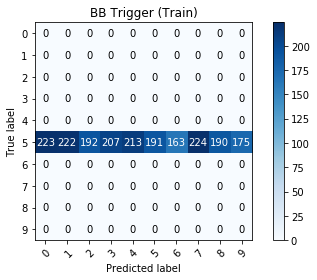

Confusion matrix, without normalization


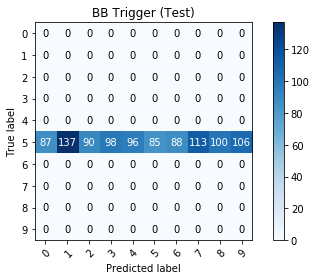

=> watermark_val: 0.0955
Epoch 4/10
30000/30000 [==============================] - 34s 1ms/step - loss: 0.0378 - acc: 0.9930 - val_loss: 0.0411 - val_acc: 0.9879
=> Time: : 33.71939206123352
=> watermark_new_val: 0.087
Confusion matrix, without normalization


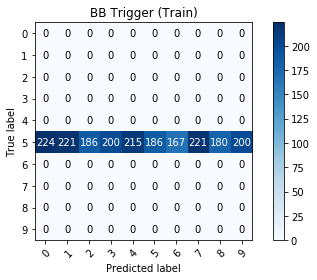

Confusion matrix, without normalization


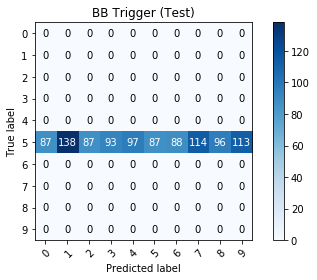

=> watermark_val: 0.093
Epoch 5/10
30000/30000 [==============================] - 34s 1ms/step - loss: 0.0375 - acc: 0.9929 - val_loss: 0.0396 - val_acc: 0.9879
=> Time: : 34.30106067657471
=> watermark_new_val: 0.083
Confusion matrix, without normalization


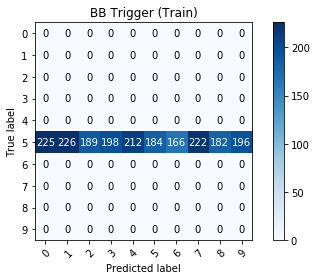

Confusion matrix, without normalization


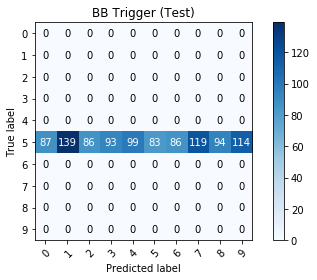

=> watermark_val: 0.092


In [2]:
surr_model, all_history = asiaccs_whitebox(
     load_dataset_func=load_mnist_images,  # Which dataset to choose. Should return training and testing data
     dataset_label="MNIST",  # Label of the dataset (for caching)
     load_wm_model_func=get_lenet_model_for_mnist,  # Model specification for wm_embedding
     wm_type="logo", # logo or gaussian
     owner_data_size=30000,
     total_owner_data_size=30000,
     key_length=5000,
     key_length_test=1000,
     attacker_data_size=30000,
     total_attacker_data_size=30000,
     attacker_data_size_reg=3000,
     epochs_embed=10,
     epochs_reg=30,
     epochs_surr=10,
     freeze_first_layers=0,
     early_stopping_wm_reg=0.2, 
     patience_reg=2,
     lr_surr=0.001,  
     reg_whitebox=0.003,
     reg_surr=0,
     batchsize_reg=64,
     batchsize_surr=64,
     cache_embed_wm="asiaccs_logo_mnist_30000",
     cache_reg_model=None,
     cache_surr_model=None,
     verbose=True
)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])


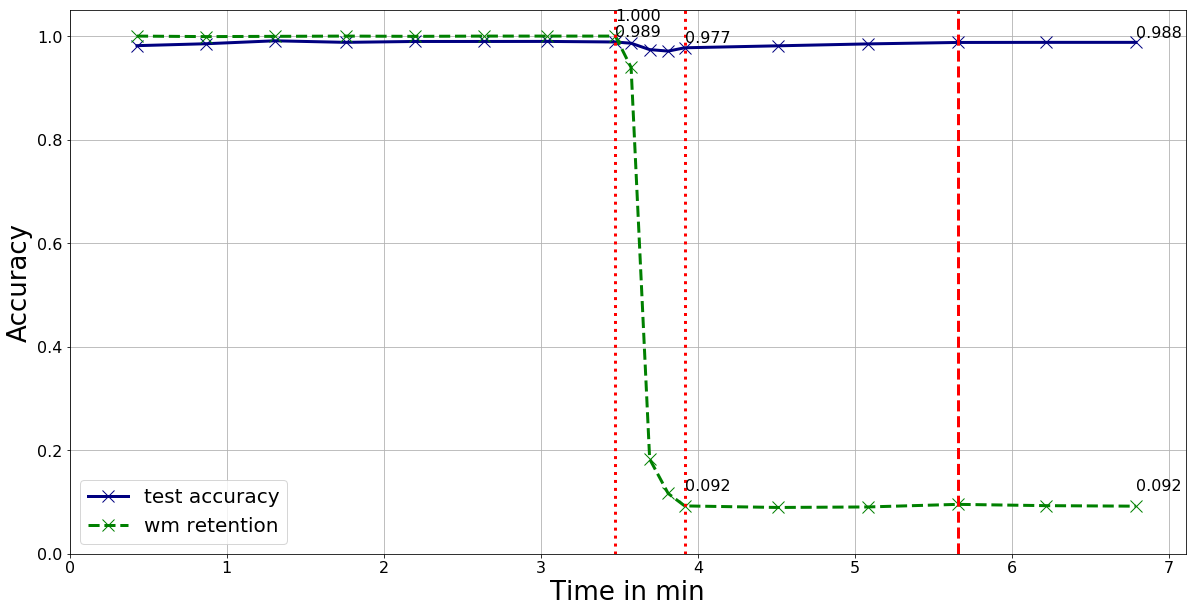

In [4]:
plot_whitebox(all_history, blackbox_surr_val_acc=0.987)

In [ ]:
for history in all_history:
    